In [91]:
!pip install scikit-learn mat73

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import IsolationForest
import seaborn as sns
import time
import mat73

In [93]:
DCCC = mat73.loadmat('smtp.mat')
x = DCCC['X']
y = DCCC['y']

In [99]:
Local_Outlier_Factor = LocalOutlierFactor(n_neighbors=10, metric='euclidean')
Start_Time = time.time()
y_predict = Local_Outlier_Factor.fit_predict(x)
End_Time = time.time()

In [100]:
Time_Local_Outlier_Factor = End_Time - Start_Time
print(f'The processing time for Local_Outlier_Factor: {Time_Local_Outlier_Factor:.3f} seconds')

The processing time for Local_Outlier_Factor: 1.142 seconds


In [101]:
Scores = Local_Outlier_Factor.negative_outlier_factor_
Scores = -Scores

In [102]:
fpr, tpr, thresholds = roc_curve(y, Scores)
Roc_Area_Under_Curve = auc(fpr, tpr)

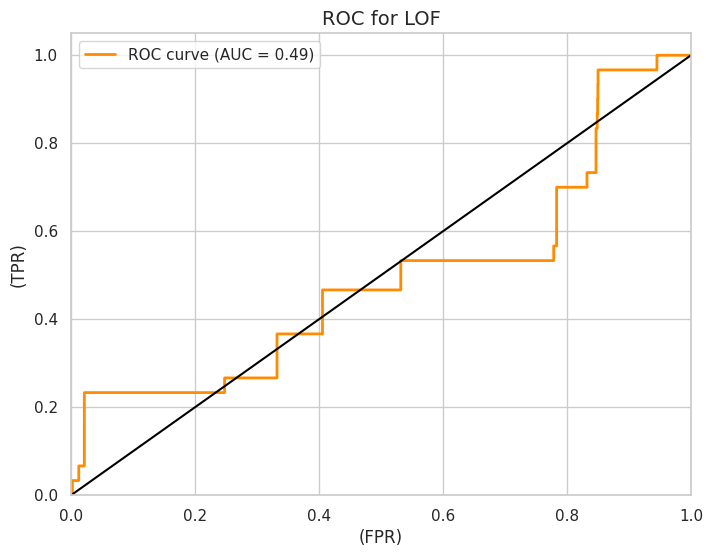

In [104]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {Roc_Area_Under_Curve:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('(FPR)', fontsize=12)
plt.ylabel('(TPR)', fontsize=12)
plt.title('ROC for LOF', fontsize=14)
plt.legend(loc='upper left')
plt.show()


In [106]:
print(f'Local Outlier Factor Processing Time: {Time_Local_Outlier_Factor} seconds')
print(f'Local Outlier Factor AUC: {Roc_Area_Under_Curve}')

Local Outlier Factor Processing Time: 1.1420700550079346 seconds
Local Outlier Factor AUC: 0.4908419709998668


In [107]:
Isolation_Forest = IsolationForest(n_estimators=100, max_samples=256)
Start_Time = time.time()
Isolation_Forest.fit(x)
End_Time = time.time()

In [108]:
Time_Isolation_Forest = End_Time - Start_Time
print(f'The Processing time for Isolation_Forest: {Time_Isolation_Forest:.3f} seconds')

The Processing time for Isolation_Forest: 0.276 seconds


In [109]:
scores = Isolation_Forest.score_samples(x)
scores = -scores

In [110]:
fpr, tpr, thresholds = roc_curve(y, scores)
Roc_Area_Under_Curve = auc(fpr, tpr)

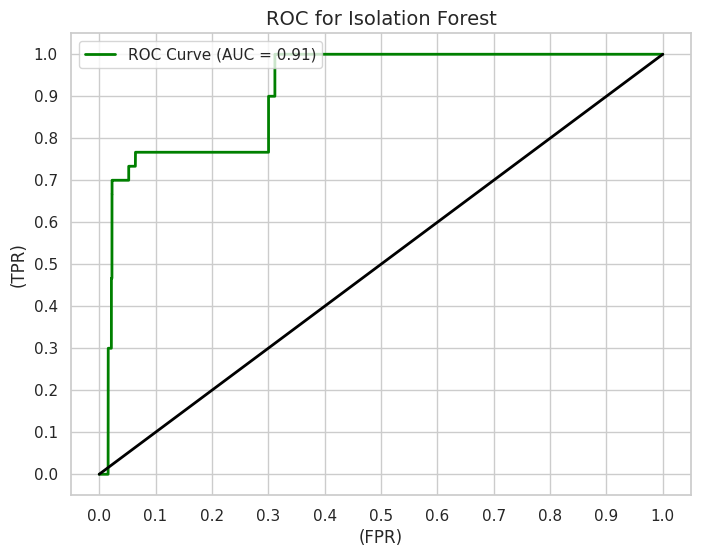

In [112]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC Curve (AUC = {Roc_Area_Under_Curve:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='-')
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xlabel('(FPR)', fontsize=12)
plt.ylabel('(TPR)', fontsize=12)
plt.title('ROC for Isolation Forest', fontsize=14)
plt.legend(loc='upper left')

plt.grid(True)
plt.show()


In [113]:
print(f'Isolation Forest Processing Time: {Time_Isolation_Forest} seconds')
print(f'Isolation Forest AUC: {Roc_Area_Under_Curve}')

Isolation Forest Processing Time: 0.2759058475494385 seconds
Isolation Forest AUC: 0.9112074161287835


In [117]:
print('Which method is more accurate and faster?')
print('- To compare the two methods we can check the processing time and Area Under Curve.')
print('- The processing time measures how fast the model can fit the data and calculate the anomaly scores.')
print('- The AUC measures how well the model can separate the outliers from the inliers.')
print('- So, based on the results, we can see that Isolation Forest is faster and more accurate than Local Outlier Factor.')
print('- Therefore, we can conclude that Isolation Forest is a better method than LOF.')

Which method is more accurate and faster?
- To compare the two methods we can check the processing time and Area Under Curve.
- The processing time measures how fast the model can fit the data and calculate the anomaly scores.
- The AUC measures how well the model can separate the outliers from the inliers.
- So, based on the results, we can see that Isolation Forest is faster and more accurate than Local Outlier Factor.
- Therefore, we can conclude that Isolation Forest is a better method than LOF.
